In [113]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("CS105 W24 Survey (Responses) - Form Responses 1.csv")

In [ ]:
# print(df['How often do you eat out or eat fast food a week?'])

eating_fastfood_freq = df['How often do you eat out or eat fast food a week?'].value_counts()

eating_fastfood_freq.plot(kind='bar')


In [ ]:
# print(df['Where do you usually get your food? (Rank from where you frequent most to least) [Glascow/Lothian (Dining Halls)]'])
eating_halls_freq = df['Where do you usually get your food? (Rank from where you frequent most to least) [Glascow/Lothian (Dining Halls)]'].value_counts().sort_index()
eating_halls_freq.plot.bar()

# etable = df.pivot_table(index=eating_halls_freq, columns="Where do you usually get your food? (Rank from where you frequent most to least) [Glascow/Lothian (Dining Halls)]")

In [ ]:
eating_hub_freq = df['Where do you usually get your food? (Rank from where you frequent most to least) [The Hub]'].value_counts().sort_index()
eating_hub_freq.plot.bar()

In [ ]:
eating_home_freq = df['Where do you usually get your food? (Rank from where you frequent most to least) [At home/bring meal from home]'].value_counts().sort_index()
eating_home_freq.plot.bar()

In [ ]:
eating_out_freq = df['Where do you usually get your food? (Rank from where you frequent most to least) [Eating Out - Going and Getting]'].value_counts().sort_index()
eating_out_freq.plot.bar()

In [ ]:
eating_delivery_freq = df['Where do you usually get your food? (Rank from where you frequent most to least) [Food Delivery]'].value_counts().sort_index()
eating_delivery_freq.plot.bar()

[]

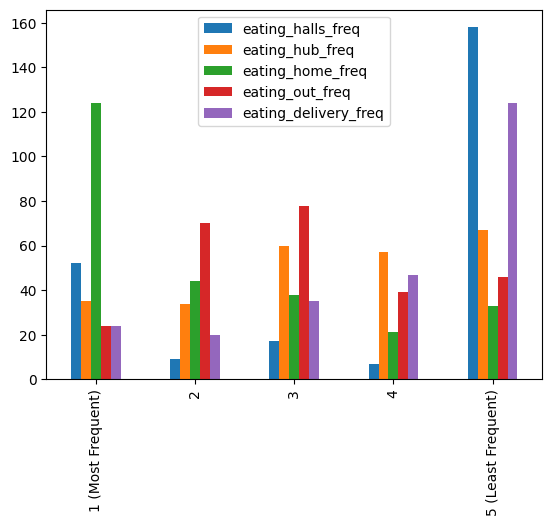

In [148]:
eating_freq = pd.concat([eating_halls_freq, eating_hub_freq, eating_home_freq, eating_out_freq, eating_delivery_freq], axis=1)
eating_graph = eating_freq.plot.bar()
eating_graph.legend(['eating_halls_freq', 'eating_hub_freq', 'eating_home_freq', 'eating_out_freq', 'eating_delivery_freq'])
eating_graph.plot(kind='bar')


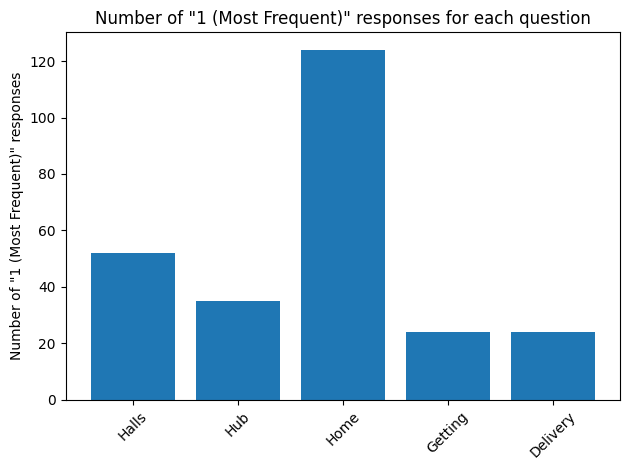

In [151]:
# eating_halls_question = 'Where do you usually get your food? (Rank from where you frequent most to least) [Glascow/Lothian (Dining Halls)]'
# value_counts = df[eating_halls_question].value_counts()
# num_of_most_frequent = value_counts.get('2', 0)
# plt.bar('Glasgow/Lothian', num_of_most_frequent)

# # plt.xlabel('Question')
# plt.ylabel('Number of "2" responses')
# plt.title('Number of "2" responses for each question')

# # Show the plot
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# plt.tight_layout()  # Adjust layout to prevent clipping of labels
# plt.show()
# # halls_condition = df[eating_halls_question] == '2'
# # eating_halls_1s = df.loc[halls_condition]

question_column_names = [
    'Where do you usually get your food? (Rank from where you frequent most to least) [Glascow/Lothian (Dining Halls)]',
    'Where do you usually get your food? (Rank from where you frequent most to least) [The Hub]',
    'Where do you usually get your food? (Rank from where you frequent most to least) [At home/bring meal from home]',
    'Where do you usually get your food? (Rank from where you frequent most to least) [Eating Out - Going and Getting]',
    'Where do you usually get your food? (Rank from where you frequent most to least) [Food Delivery]'
    
    
]

question_labels = ['Halls', 'Hub', 'Home', 'Getting', 'Delivery']
counts_of_ones = []

for question_column_name in question_column_names:
    
    value_counts = df[question_column_name].value_counts()
    
    
    num_of_most_frequent = value_counts.get('1 (Most Frequent)', 0)

    
    counts_of_ones.append(num_of_most_frequent)

plt.bar(question_labels, counts_of_ones)


plt.ylabel('Number of "1 (Most Frequent)" responses')
plt.title('Number of "1 (Most Frequent)" responses for each question')


plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()


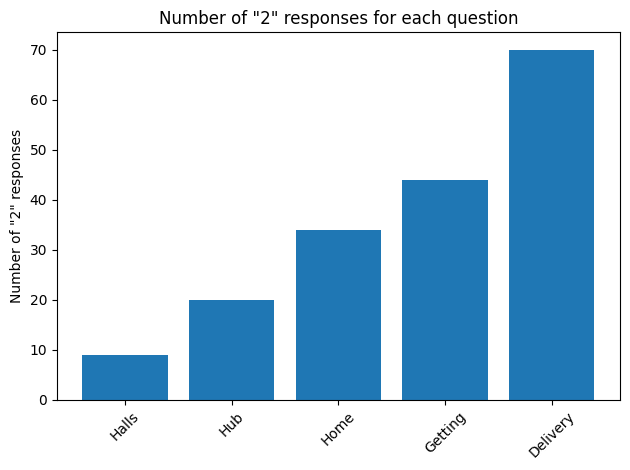

In [144]:
question_column_names = [
    'Where do you usually get your food? (Rank from where you frequent most to least) [Glascow/Lothian (Dining Halls)]',
    'Where do you usually get your food? (Rank from where you frequent most to least) [The Hub]',
    'Where do you usually get your food? (Rank from where you frequent most to least) [At home/bring meal from home]',
    'Where do you usually get your food? (Rank from where you frequent most to least) [Eating Out - Going and Getting]',
    'Where do you usually get your food? (Rank from where you frequent most to least) [Food Delivery]'
]

question_labels = ['Halls', 'Hub', 'Home', 'Getting', 'Delivery']
counts_of_twos = []

for question_column_name in question_column_names:
    
    value_counts = df[question_column_name].value_counts()
    
    
    num_of_most_frequent = value_counts.get('2', 0)

    
    counts_of_twos.append(num_of_most_frequent)


plt.bar(question_labels, counts_of_twos)


plt.ylabel('Number of "2" responses')
plt.title('Number of "2" responses for each question')


plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

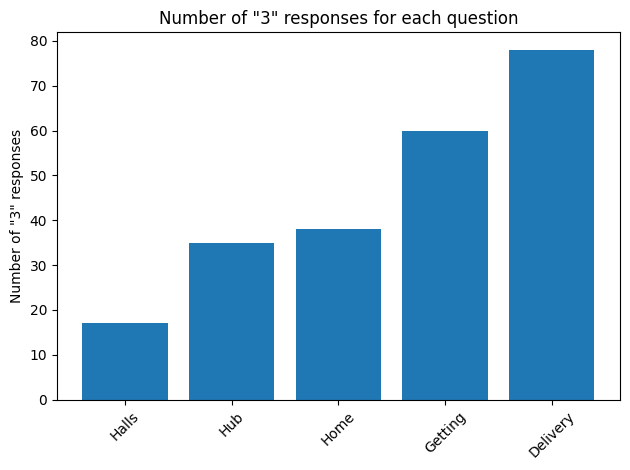

In [142]:
question_column_names = [
    'Where do you usually get your food? (Rank from where you frequent most to least) [Glascow/Lothian (Dining Halls)]',
    'Where do you usually get your food? (Rank from where you frequent most to least) [The Hub]',
    'Where do you usually get your food? (Rank from where you frequent most to least) [At home/bring meal from home]',
    'Where do you usually get your food? (Rank from where you frequent most to least) [Eating Out - Going and Getting]',
    'Where do you usually get your food? (Rank from where you frequent most to least) [Food Delivery]'
]

question_labels = ['Halls', 'Hub', 'Home', 'Getting', 'Delivery']
counts_of_threes = []

for question_column_name in question_column_names:
    
    value_counts = df[question_column_name].value_counts()
    
    
    num_of_most_frequent = value_counts.get('3', 0)

    
    counts_of_threes.append(num_of_most_frequent)


plt.bar(question_labels, counts_of_threes)


plt.ylabel('Number of "3" responses')
plt.title('Number of "3" responses for each question')


plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

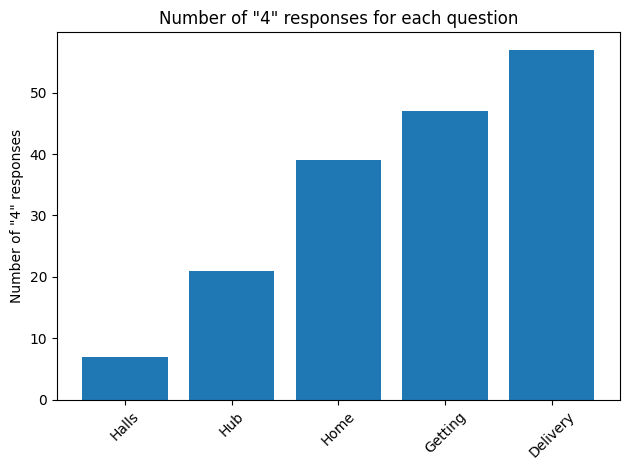

In [136]:
question_column_names = [
    'Where do you usually get your food? (Rank from where you frequent most to least) [Glascow/Lothian (Dining Halls)]',
    'Where do you usually get your food? (Rank from where you frequent most to least) [The Hub]',
    'Where do you usually get your food? (Rank from where you frequent most to least) [At home/bring meal from home]',
    'Where do you usually get your food? (Rank from where you frequent most to least) [Eating Out - Going and Getting]',
    'Where do you usually get your food? (Rank from where you frequent most to least) [Food Delivery]'
]

question_labels = ['Halls', 'Hub', 'Home', 'Getting', 'Delivery']
counts_of_fours = []

for question_column_name in question_column_names:
    
    value_counts = df[question_column_name].value_counts()
    
    
    num_of_most_frequent = value_counts.get('4', 0)

    
    counts_of_fours.append(num_of_most_frequent)


plt.bar(question_labels, counts_of_fours)


plt.ylabel('Number of "4" responses')
plt.title('Number of "4" responses for each question')


plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

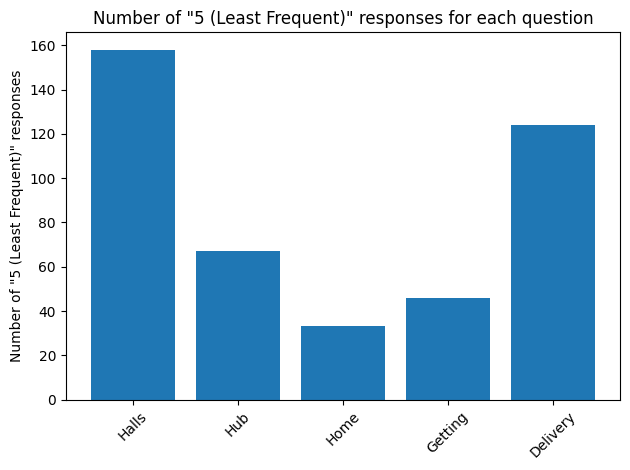

In [164]:
question_column_names = [
    'Where do you usually get your food? (Rank from where you frequent most to least) [Glascow/Lothian (Dining Halls)]',
    'Where do you usually get your food? (Rank from where you frequent most to least) [The Hub]',
    'Where do you usually get your food? (Rank from where you frequent most to least) [At home/bring meal from home]',
    'Where do you usually get your food? (Rank from where you frequent most to least) [Eating Out - Going and Getting]',
    'Where do you usually get your food? (Rank from where you frequent most to least) [Food Delivery]'
]

question_labels = ['Halls', 'Hub', 'Home', 'Getting', 'Delivery']
counts_of_fives = []



for question_column_name in question_column_names:
    
    value_counts = df[question_column_name].value_counts()
    
    
    num_of_most_frequent = value_counts.get('5 (Least Frequent)', 0)

    
    counts_of_fives.append(num_of_most_frequent)


plt.bar(question_labels, counts_of_fives)


plt.ylabel('Number of "5 (Least Frequent)" responses')
plt.title('Number of "5 (Least Frequent)" responses for each question')


plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

Average response for "Where do you usually get your food? (Rank from where you frequent most to least) [Glascow/Lothian (Dining Halls)]": 3.8641975308641974
Average response for "Where do you usually get your food? (Rank from where you frequent most to least) [The Hub]": 3.343873517786561
Average response for "Where do you usually get your food? (Rank from where you frequent most to least) [At home/bring meal from home]": 2.2115384615384617
Average response for "Where do you usually get your food? (Rank from where you frequent most to least) [Eating Out - Going and Getting]": 3.0505836575875485
Average response for "Where do you usually get your food? (Rank from where you frequent most to least) [Food Delivery]": 3.908


<BarContainer object of 5 artists>

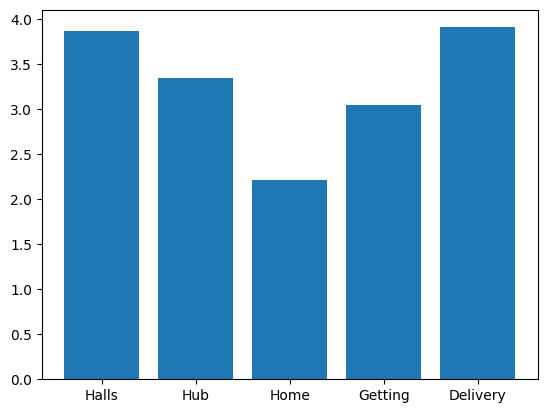

In [167]:
question_column_name = 'Where do you usually get your food? (Rank from where you frequent most to least) [Glascow/Lothian (Dining Halls)]'

# Create a dictionary to map the string responses to numeric values
response_mapping = {
    "1 (Most Frequent)": 1,
    "2": 2,
    "3": 3,
    "4": 4,
    "5 (Least Frequent)": 5
}

question_column_names = [
    'Where do you usually get your food? (Rank from where you frequent most to least) [Glascow/Lothian (Dining Halls)]',
    'Where do you usually get your food? (Rank from where you frequent most to least) [The Hub]',
    'Where do you usually get your food? (Rank from where you frequent most to least) [At home/bring meal from home]',
    'Where do you usually get your food? (Rank from where you frequent most to least) [Eating Out - Going and Getting]',
    'Where do you usually get your food? (Rank from where you frequent most to least) [Food Delivery]'
]

question_labels = ['Halls', 'Hub', 'Home', 'Getting', 'Delivery']
average_responses = []
for question in question_column_names:
    mapped_responses = df[question].map(response_mapping)
    # Replace string responses with corresponding numeric values
    # df.dropna(subset=[question_column_name], inplace=True)

    # Calculate the average of responses for the question
    average_responses.append(mapped_responses.mean()) 


for question, response in zip(question_column_names, average_responses):
    print(f'Average response for "{question}": {response}')




plt.bar(question_labels, average_responses)

1. What data do you have? (Your answer)
2. What would you like to know? (Your answer)
3. Explore and present the data. (Generate statistics, perform visualizations)
4. Can you state any hypotheses or make predictions? Which tests can you apply to
verify your hypothesis? (Your answer).
5. Test your hypotheses.
6. Draw the overall conclusion.
